In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('BostonHousing.csv')

print(df.head())
print(df.info())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float6

In [ ]:
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


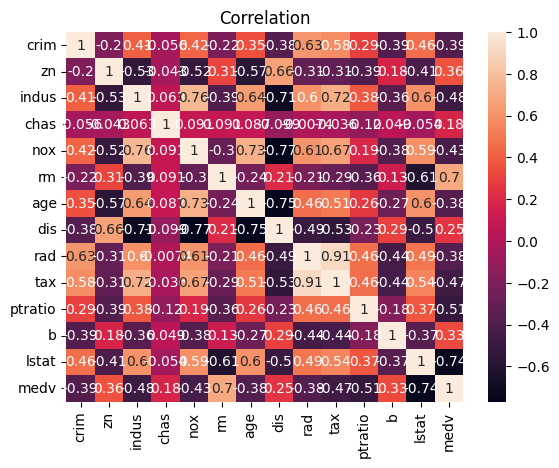

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation")
plt.show()

In [ ]:
X = df.drop('medv', axis=1)  # house price
y = df['medv']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)


print("----- Linear Regression -----")
print("MAE:", mean_absolute_error(y_test, pred_lr))
mse = mean_squared_error(y_test, pred_lr)
print("RMSE:", np.sqrt(mse))
print("R2:", r2_score(y_test, pred_lr))

----- Linear Regression -----
MAE: 3.189091965887837
RMSE: 4.928602182665332
R2: 0.6687594935356326


In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)


print("\n----- Random Forest -----")
print("MAE:", mean_absolute_error(y_test, pred_rf))
mse_rf = mean_squared_error(y_test, pred_rf)
print("RMSE:", np.sqrt(mse_rf))
print("R2:", r2_score(y_test, pred_rf))


----- Random Forest -----
MAE: 2.050754901960784
RMSE: 2.8941989765194576
R2: 0.8857772317926959


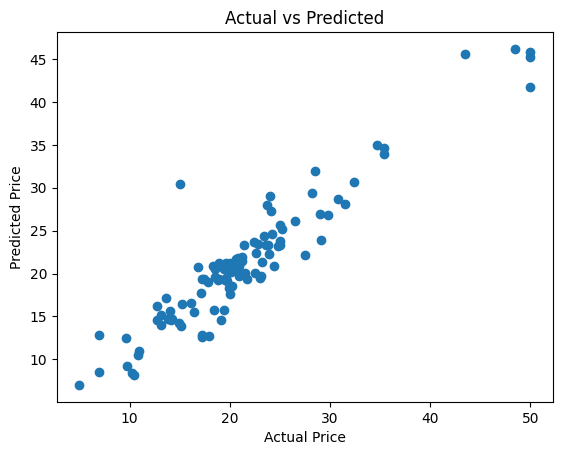

In [ ]:
plt.scatter(y_test, pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

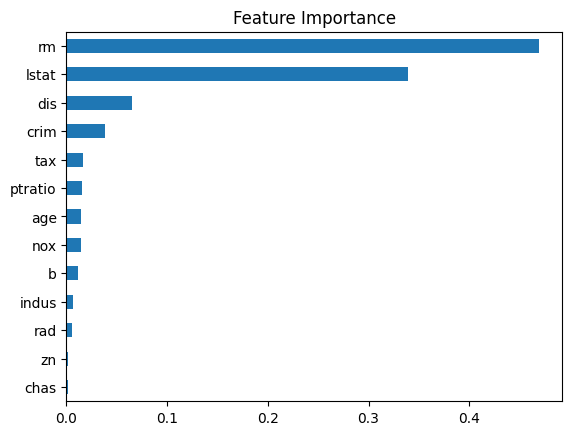

In [ ]:
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()


In [ ]:
df.to_csv('cleaned_BostonHousing.csv', index=False)
from google.colab import files
files.download('cleaned_BostonHousing.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>